In [215]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)
library(forcats)
library(reshape2)
library("dplyr")
library("foreign")
library("data.table")
library("car")
library(semPlot)
library(lavaan)
library(factoextra)

In [216]:
data <- read_csv("nsw.csv", show_col_types = FALSE)
categorical_columns <- c(
  "Gender", "Industry", "FamilyStatus",
  "Location",  "ManagingRole"
)
numeric_columns <- c(
  "Age","Experience", "CommuteTimeDiff", "WorkTimeDiff", "HouseworkTimeDiff",
   "FamilyTimeDiff", "RemoteWorkExtent", "RemoteWorkSupport", "Productivity",
  "ReducedPromotion", "SocialIsolation", "SleepTimeDiff",
  "ExtraCosts", "WorkCompatibility", "Motivation",
  "HomeEnvironment", "Wellbeing", "MentalHealth", "PhysicalActivity",
  "Sociability"
)

In [217]:
data[numeric_columns] <- lapply(data[numeric_columns], scale)

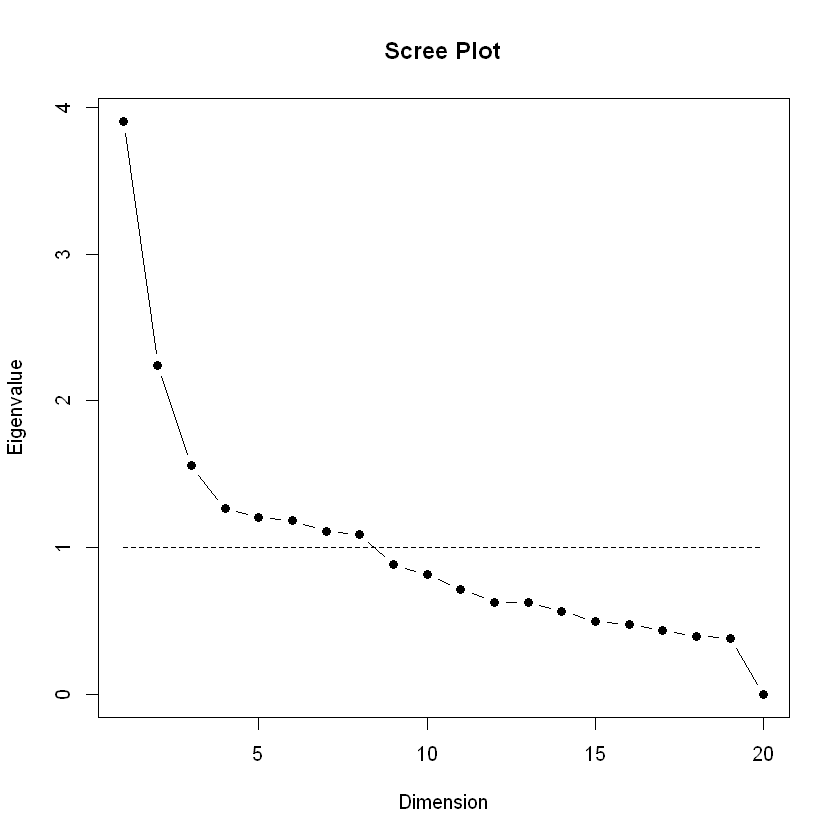

In [218]:
scree.plot(data[numeric_columns])

In [219]:
library("psych")
library("psy")
library("tidyverse") 

correlation_matrix <- cor(data[numeric_columns], use = "complete.obs")

data <- na.omit(data)


pr_ititial <- principal(correlation_matrix,
    nfactors = 9,
    rotate = "varimax"
)
# h2 - communalities
print(pr_ititial$Structure, digits=3, cutoff = 0.4, sort = T)


Loadings:
                  RC1    RC2    RC3    RC6    RC4    RC7    RC5    RC9   
SocialIsolation    0.735                                                 
ExtraCosts         0.716                                                 
WorkCompatibility  0.693                                                 
Motivation         0.737                                                 
HomeEnvironment    0.788                                                 
Wellbeing          0.780                                                 
Productivity              0.673                                          
MentalHealth              0.785                                          
PhysicalActivity          0.806                                          
CommuteTimeDiff                  0.827                                   
FamilyTimeDiff                  -0.824                                   
RemoteWorkExtent                        0.784                            
RemoteWorkSupport          

In [225]:
library(lavaan)

model <- '
  WorkAdaptability =~ WorkCompatibility + Motivation
  JobWellbeing =~ MentalHealth + PhysicalActivity
  RemoteWorkStructure =~ RemoteWorkExtent + RemoteWorkSupport + WorkCompatibility
  WorkflexBalance =~ CommuteTimeDiff + RemoteWorkExtent
  PersonalContext =~ Age + CommuteTimeDiff + FamilyTimeDiff
  WorkEffectiveness =~ FamilyTimeDiff + Motivation

  MentalHealth ~ WorkAdaptability + WorkflexBalance + WorkEffectiveness  

  JobWellbeing ~ WorkAdaptability + RemoteWorkStructure + WorkflexBalance + PersonalContext

  WorkAdaptability ~~ CommuteTimeDiff
'

fit <- sem(model, data = data[numeric_columns])

chisq_value <- fitMeasures(fit, "chisq")
df <- fitMeasures(fit, "df")
p_value <- fitMeasures(fit, "pvalue")

# Print the results
cat("Chi-square value:", chisq_value, "\n")
cat("Degrees of freedom:", df, "\n")
cat("P-value:", p_value, "\n")

lavInspect(fit, "cov.lv")
summary(fit, fit.measures = TRUE)

varTable(fit)

Warning message in lav_object_post_check(object):
"lavaan WARNING: covariance matrix of latent variables
                is not positive definite;
                use lavInspect(fit, "cov.lv") to investigate."


Chi-square value: 0.4688004 
Degrees of freedom: 4 
P-value: 0.9764663 


,WorkAdaptability,JobWellbeing,RemoteWorkStructure,WorkflexBalance,PersonalContext,WorkEffectiveness
WorkAdaptability,0.35667675,0.222567609,0.20769216,0.64584574,-0.09259172,-0.184061094
JobWellbeing,0.22256761,0.734234685,0.39650396,0.73658577,-0.03917366,-0.008882382
RemoteWorkStructure,0.20769216,0.396503964,0.70370761,-0.02522013,0.03448676,-0.031286812
WorkflexBalance,0.64584574,0.736585774,-0.02522013,0.64541756,-0.08843418,-0.497101548
PersonalContext,-0.09259172,-0.039173656,0.03448676,-0.08843418,0.10846714,0.077573071
WorkEffectiveness,-0.18406109,-0.008882382,-0.03128681,-0.49710155,0.07757307,0.379475936


lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
WorkAdaptability,=~,WorkCompatibility,0,1.000000000,0.00000000,NA,NA
WorkAdaptability,=~,Motivation,0,1.444290224,0.36892818,3.91482756,9.046884e-05
JobWellbeing,=~,MentalHealth,0,1.000000000,0.00000000,NA,NA
JobWellbeing,=~,PhysicalActivity,0,0.872245017,0.49758740,1.75294836,7.961087e-02
RemoteWorkStructure,=~,RemoteWorkExtent,0,1.000000000,0.00000000,NA,NA
RemoteWorkStructure,=~,RemoteWorkSupport,0,0.579032314,0.18165231,3.18758576,1.434659e-03
RemoteWorkStructure,=~,WorkCompatibility,0,-0.164265604,0.09107838,-1.80356306,7.129983e-02
WorkflexBalance,=~,CommuteTimeDiff,0,1.000000000,0.00000000,NA,NA
WorkflexBalance,=~,RemoteWorkExtent,0,-0.350598338,0.09224424,-3.80076117,1.442523e-04


,name,idx,nobs,type,exo,user,mean,var,nlev,lnam
,<chr>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
1,WorkCompatibility,14,1420,numeric,0,0,-2.467877e-18,1,0,
2,Motivation,15,1420,numeric,0,0,-6.271048e-17,1,0,
3,MentalHealth,18,1420,numeric,0,0,1.405813e-16,1,0,
4,PhysicalActivity,19,1420,numeric,0,0,5.093536e-18,1,0,
5,RemoteWorkExtent,7,1420,numeric,0,0,1.142824e-16,1,0,
6,RemoteWorkSupport,8,1420,numeric,0,0,1.497034e-16,1,0,
7,CommuteTimeDiff,3,1420,numeric,0,0,-4.963749e-17,1,0,
8,Age,1,1420,numeric,0,0,9.785306e-19,1,0,
9,FamilyTimeDiff,6,1420,numeric,0,0,-2.554514e-17,1,0,


In [ ]:
parameterEstimates(fit)


lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WorkAdaptability,=~,WorkCompatibility,1.000000000,0.00000000,NA,NA,1.00000000,1.00000000
WorkAdaptability,=~,Motivation,1.444290224,0.36892818,3.91482756,9.046884e-05,0.72120427,2.16737618
JobWellbeing,=~,MentalHealth,1.000000000,0.00000000,NA,NA,1.00000000,1.00000000
JobWellbeing,=~,PhysicalActivity,0.872245017,0.49758740,1.75294836,7.961087e-02,-0.10300836,1.84749840
RemoteWorkStructure,=~,RemoteWorkExtent,1.000000000,0.00000000,NA,NA,1.00000000,1.00000000
RemoteWorkStructure,=~,RemoteWorkSupport,0.579032314,0.18165231,3.18758576,1.434659e-03,0.22300033,0.93506430
RemoteWorkStructure,=~,WorkCompatibility,-0.164265604,0.09107838,-1.80356306,7.129983e-02,-0.34277595,0.01424474
WorkflexBalance,=~,CommuteTimeDiff,1.000000000,0.00000000,NA,NA,1.00000000,1.00000000
WorkflexBalance,=~,RemoteWorkExtent,-0.350598338,0.09224424,-3.80076117,1.442523e-04,-0.53139373,-0.16980294


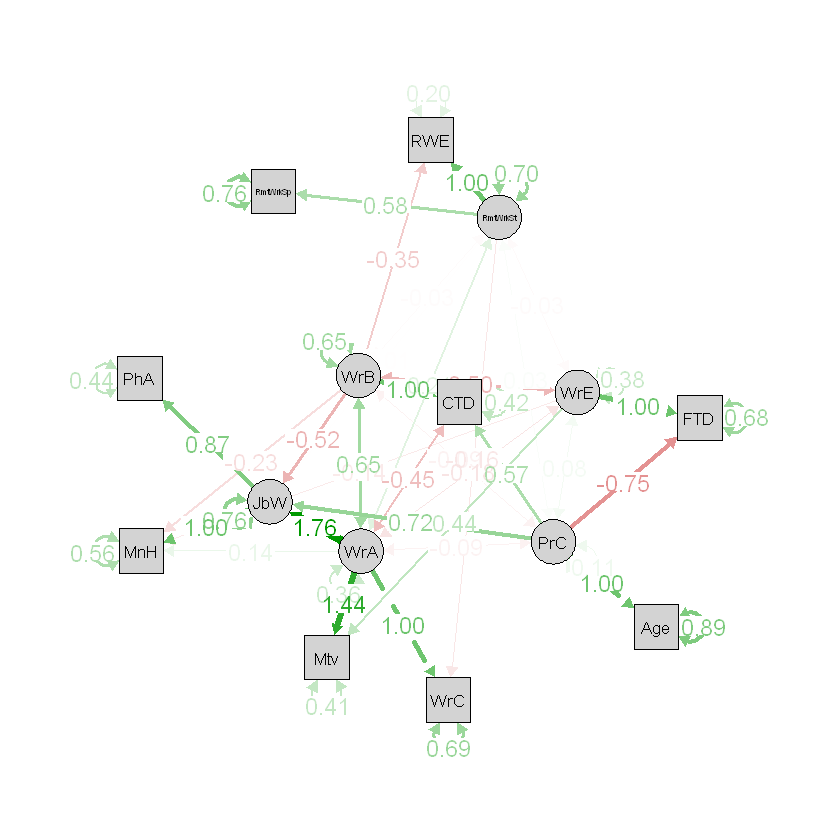

In [ ]:
library(semPlot)

# semPaths(fit, whatLabels = "std", layout = "tree", edge.color = "black", 
#          title = TRUE, nCharNodes = 1)

semPaths(
    object =fit,
    what ="est",
    style ='ram',
    layout ="spring",
    rotation =1,
    sizeMan =5,
    sizeLat =5,
    color ="lightgray",
    edge.label.cex =1.2,
    label.cex =1.2
)